In [125]:
import requests
import pandas as pd

# API endpoint
url = "http://localhost:8080/shots?player_id=1628369"

# Fetch data from the API
response = requests.get(url)

if response.status_code == 200:
    # Parse JSON data
    shots_data = response.json()
    
    # Load data into a Pandas DataFrame
    df = pd.DataFrame(shots_data)
    
    print(df.head())  # Display the first few rows of the DataFrame
else:
    print(f"Failed to fetch data. Status code: {response.status_code}")


        id  loc_x  loc_y  shot_made       shot_type  elapsed
0  2770792   23.2  11.15       True  3PT Field Goal       10
1  2770797    9.6  22.35      False  2PT Field Goal       10
2  2771016   -0.6  30.55      False  3PT Field Goal       10
3  2771061    0.1   7.25       True  2PT Field Goal       10
4  2771086    6.7  30.45       True  3PT Field Goal       10


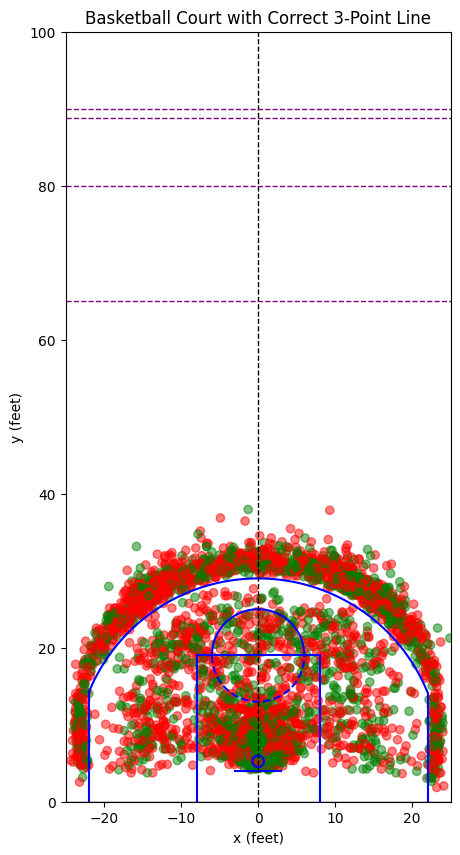

In [160]:
import numpy as np
import matplotlib.pyplot as plt

# 3-point line dimensions (in feet)
radius = 23.75  # Radius of the semicircle
straight_x = 22  # Straight sections start at x = ±22
straight_y = 14  # Height where straight lines meet the arc
basket_dist = 5.25
basket_radius = 0.75
bb_dist = 4
# Semicircle points (only the upper part, to connect straight lines)
theta = np.linspace(np.arccos(straight_x / radius), np.pi - np.arccos(straight_x / radius), 500)
# theta = np.linspace(-np.arctan(4/22), np.pi + np.arctan(4/22), 500)
x_arc = radius * np.cos(theta)
y_arc = radius * np.sin(theta)+basket_dist

# Straight lines
x_straight_left = [-straight_x, -straight_x]
x_straight_right = [straight_x, straight_x]
y_straight = [0, straight_y]

# box
ft_line_y = 19
key_x = 8
key_x_left = [-key_x, -key_x]
key_x_right = [key_x, key_x]
key_y = [0, ft_line_y]
key_y_h = [ft_line_y, ft_line_y]
key_x_h = [-key_x, key_x]

# basket
basket_w = 3
basket_x = [-basket_w, basket_w]
basket_y = [bb_dist, bb_dist]
# hoop
basket_theta = np.linspace(0, 2*np.pi, 100)  # Full circle from 0 to 2π
hoop_x = basket_radius * np.cos(basket_theta)  # Use the 0.75 feet radius
hoop_y = basket_radius * np.sin(basket_theta) + basket_dist

# ft circle
ft_circ_r = 6
ft_circ_dist = 19
ft_theta = np.linspace(0, np.pi, 100)  # Full circle from 0 to 2π
ft_circ_x = ft_circ_r * np.cos(ft_theta)  # Use the 0.75 feet radius
ft_circ_y = ft_circ_r * np.sin(ft_theta) + ft_circ_dist
ft_theta_b = np.linspace(np.pi, 2*np.pi, 100)  # Full circle from 0 to 2π
ft_circ_x_b = ft_circ_r * np.cos(ft_theta_b)  # Use the 0.75 feet radius
ft_circ_y_b = ft_circ_r * np.sin(ft_theta_b) + ft_circ_dist
# Plotting
plt.figure(figsize=(6, 10))
plt.plot(x_arc, y_arc, color="blue")  # Semicircle
plt.plot(x_straight_left, y_straight, color="blue")  # Left straight line
plt.plot(x_straight_right, y_straight, color="blue")  # Right straight line
plt.plot(key_x_right, key_y, color="blue")
plt.plot(key_x_left, key_y, color="blue")
plt.plot(key_x_h, key_y_h, color="blue")
plt.plot(basket_x, basket_y, color="blue")
plt.plot(hoop_x, hoop_y, color="blue")
plt.plot(ft_circ_x, ft_circ_y, color="blue")
plt.plot(ft_circ_x_b, ft_circ_y_b, color="blue", linestyle="--")
# Court boundaries
plt.xlim(-25, 25)  # Court width
plt.ylim(0, 100)  # Court height
plt.axhline(0, color="black", linewidth=1)  # Baseline
plt.axvline(0, color="black", linewidth=1, linestyle="--")  # Hoop center
plt.title("Basketball Court with Correct 3-Point Line")
plt.xlabel("x (feet)")
plt.ylabel("y (feet)")
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(
    df['loc_x'], 
    df['loc_y'], 
    c=df['shot_made'].map({True: 'green', False: 'red'}), 
    alpha=0.5
)

plt.axhline(94-29, color="purple", linestyle="--", linewidth=1, label="y = 27.75")
plt.axhline(94-5.25, color="purple", linestyle="--", linewidth=1, label="y = 27.75")
plt.axhline(94-4, color="purple", linestyle="--", linewidth=1, label="y = 27.75")
plt.axhline(94-14, color="purple", linestyle="--", linewidth=1, label="y = 27.75")

plt.show()
